<a href="https://colab.research.google.com/github/inggitrestuillahi/Unsupervised-Learning/blob/main/case_base_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inggit Restu Illahi
# 1301204446
# IF 44 10



---



# Dataset

In [ ]:
# import numpy 
import numpy as np

# import pandas
import pandas as pd

# import seaborn untuk visualisasi
import seaborn as sns

from scipy.stats import boxcox

# import matplotlib untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import plotly untuk grafik
import plotly
import plotly.express as px

# initialisasi ukuran plot
plt.rcParams['figure.figsize'] = [12,6]

# import package untuk preprocessing data ke skalar standar
from sklearn.preprocessing import StandardScaler

# import package untuk clustering
from sklearn.cluster import KMeans

# import package untuk silhouette_score
from sklearn.metrics import silhouette_score,silhouette_samples,accuracy_score

# import package untuk euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

# import package untuk nearest neighbours
from sklearn.neighbors import NearestNeighbors

from scipy.spatial.distance import pdist

# import packing untuk ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#import dataset
#uploading file dataset

from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv


In [ ]:
# membaca 5 dataset teratas
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# membaca 5 dataset terbawah
country_df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
# menampilkan ukuran dataset
country_df.shape

(167, 10)

In [ ]:
# menampilkan tipe dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


tipe dataset adalah float64 dan int64

In [ ]:
# menampilkan data yang hilang
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

tidak ada data yang hilang

In [ ]:
# menampilkan deskripsi dataset
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# kolom country dijadikan index 
country_df.set_index('country',inplace=True)
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


kolom country jadi index karena pada saat pengolahan data kolom country tidak diperlukan, yang diperlukan hanyalah data yang berbentuk integer



---



# Pra - pemrosesan

In [ ]:
# cek duplikasi pada dataset
print('Duplikasi pada dataset : ', country_df.duplicated().sum())

Duplikasi pada dataset :  0


tidak ada duplikasi

In [ ]:
# cek data kosong pada dataset
for col in country_df.columns:
    print('{} - Null: {}'.format(col, country_df[col].isnull().sum()))

child_mort - Null: 0
exports - Null: 0
health - Null: 0
imports - Null: 0
income - Null: 0
inflation - Null: 0
life_expec - Null: 0
total_fer - Null: 0
gdpp - Null: 0


tidak ada data kosong

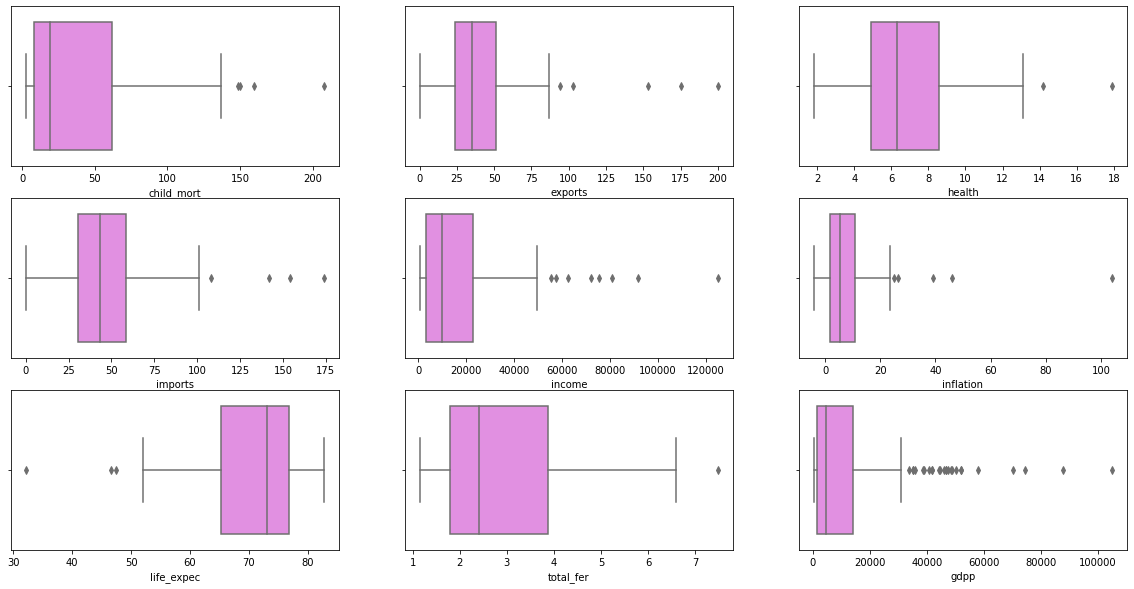

In [ ]:
# deteksi outliers
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 10))

for variable, subplot in zip(country_df.columns, ax.flatten()):
      sns.boxplot(country_df[variable], ax = subplot, color='violet')
plt.show()

Dari plot di atas kita dapat mengamati bahwa ada beberapa fitur dengan outlier. Dan faktor-faktor ini merupakan faktor utama yang menentukan kondisi sosial ekonomi negara.

Karena jumlah baris data sangat sedikit, saya tidak akan menghapus outlier.

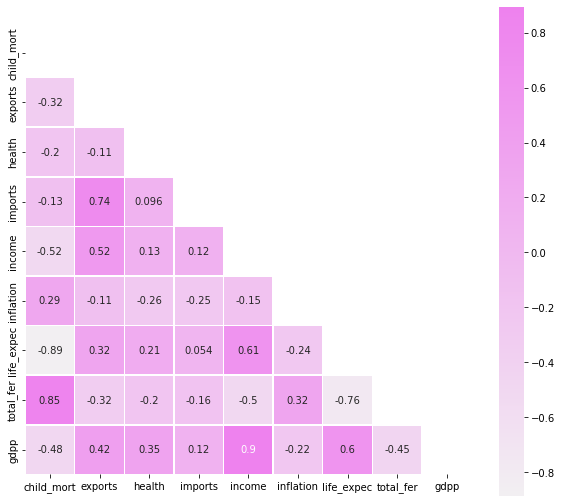

In [ ]:
# cek korelasi antar fitur
corr = country_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.light_palette('violet', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None,center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

gdpp dan income,imports dan exports dan total_fertility berkorelasi sangat positif sedangkan life_expectation dan child_mortality berkorelasi sangat negatif

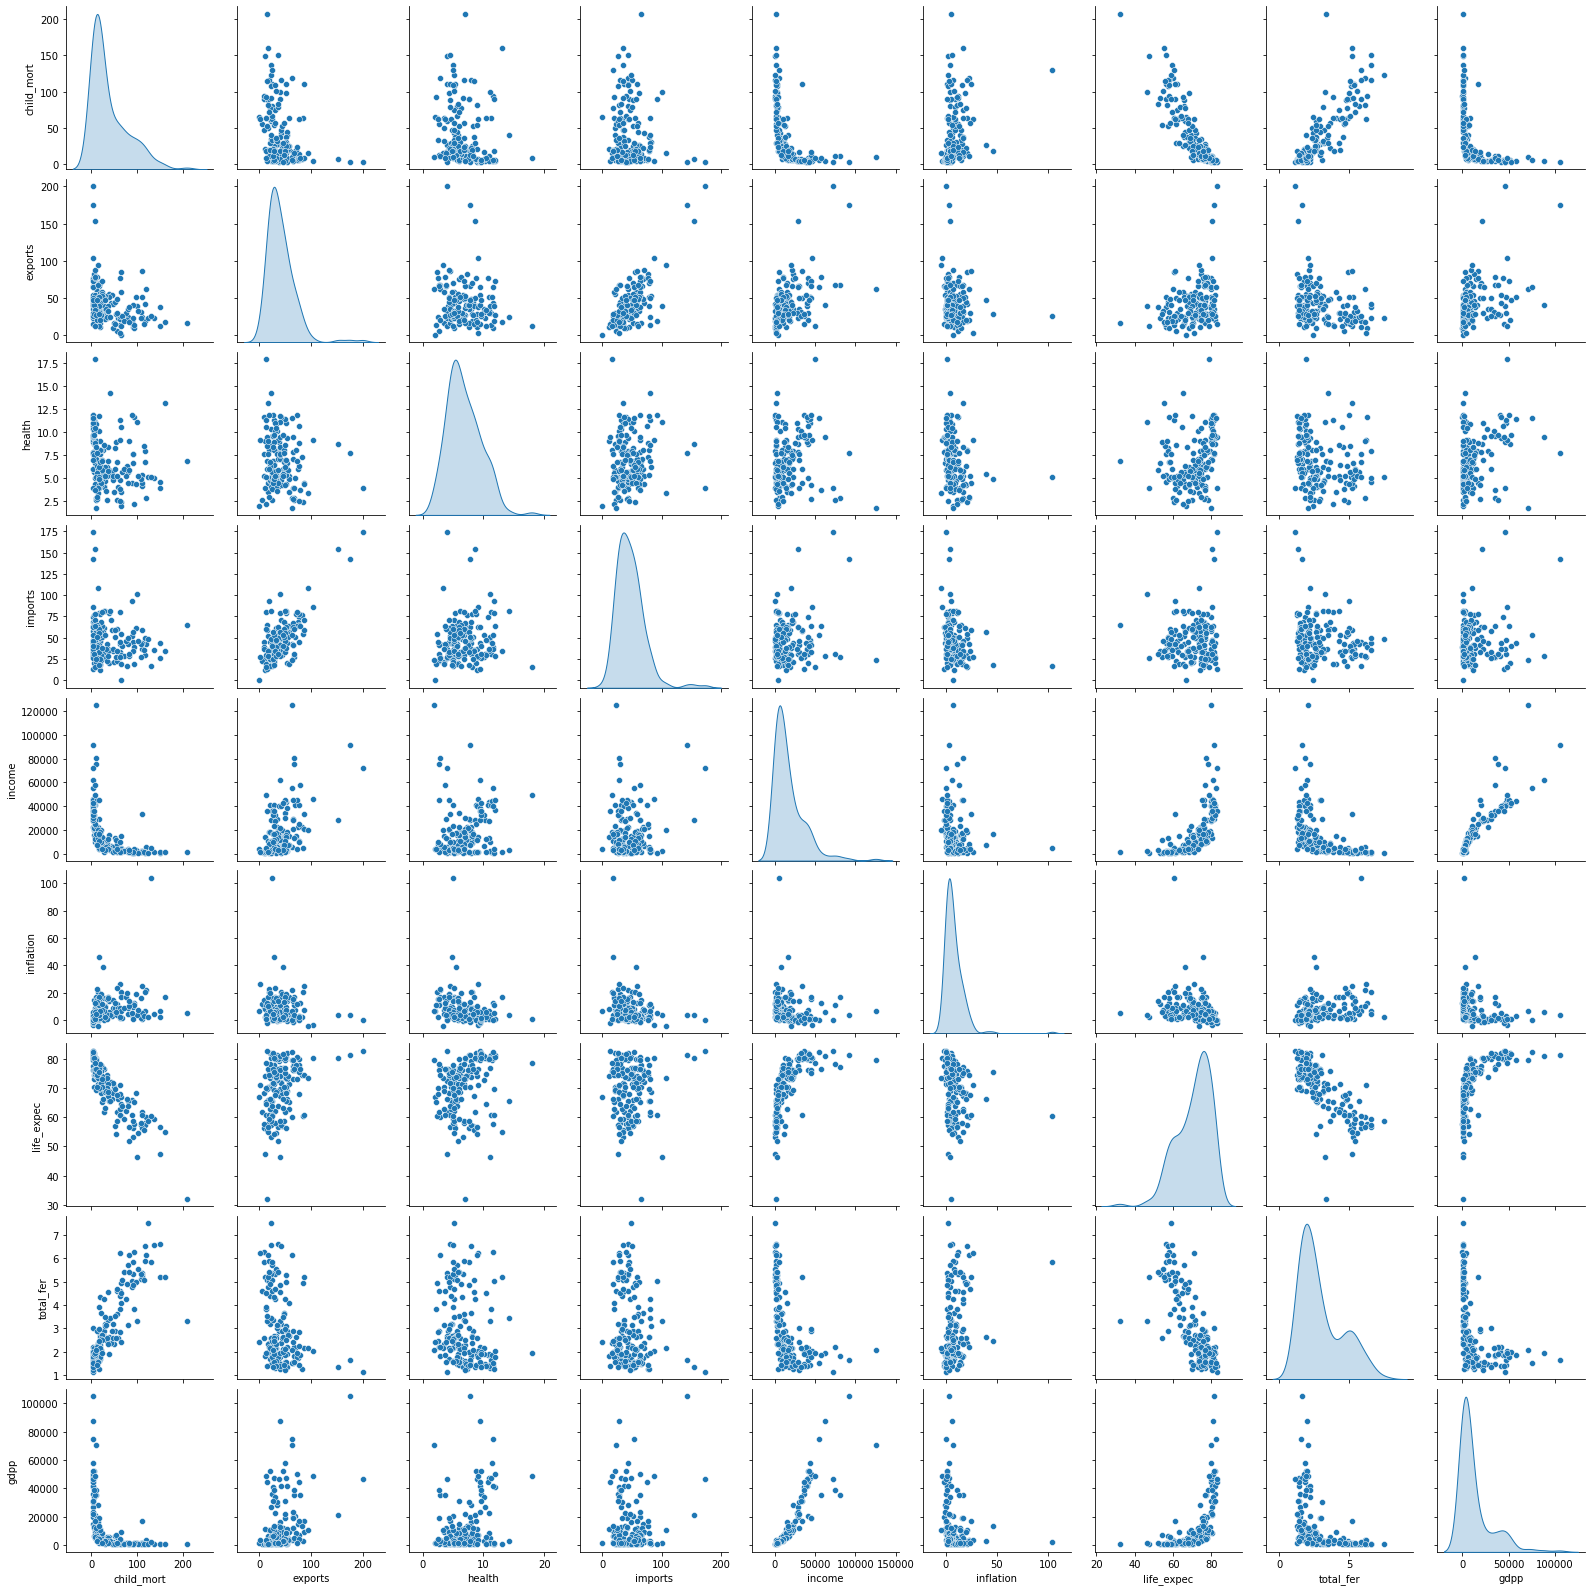

In [ ]:
# visualisasi dataset
sns.pairplot(data=country_df,diag_kind='kde')
plt.show()

bisa dilihat persebaran datanya masih banyak yang menyebar, maka dari itu diperlukan transformasi agar persebaran datanya lebih jelas.

In [ ]:
# menampilkan distribusi data
country_df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

bisa dilihat bahwa distribusi datanya beragam

In [ ]:
# cek distribusi kolom normal atau tidak (dengan nilai acuan 0.75)
def normalisasi(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. Variabel terdistribusi dengan TIDAK NORMAL.'.format(data.skew().index[var],
                                                                                      round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. Variabel terdistribusi dengan NORMAL.'.format(data.skew().index[var],
                                                                                      round(data.skew()[var],2)))
            
normalisasi(country_df)

"child_mort" skew: 1.45. Variabel terdistribusi dengan TIDAK NORMAL.
"exports" skew: 2.45. Variabel terdistribusi dengan TIDAK NORMAL.
"health" skew: 0.71. Variabel terdistribusi dengan NORMAL.
"imports" skew: 1.91. Variabel terdistribusi dengan TIDAK NORMAL.
"income" skew: 2.23. Variabel terdistribusi dengan TIDAK NORMAL.
"inflation" skew: 5.15. Variabel terdistribusi dengan TIDAK NORMAL.
"life_expec" skew: -0.97. Variabel terdistribusi dengan TIDAK NORMAL.
"total_fer" skew: 0.97. Variabel terdistribusi dengan TIDAK NORMAL.
"gdpp" skew: 2.22. Variabel terdistribusi dengan TIDAK NORMAL.


In [ ]:
# melakukan transformasi kolom menggunakan boxcox
def transformasi(data):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            data[col], lam_val = boxcox(data[col] + abs(country_df.min().min())+0.001)
            lam.append(lam_val)
    return data, lam

In [ ]:
# melakukan transformasi dan menghitung distribusi dataset
bc_data = country_df.copy()
bc_data, lambda_list = transformasi(bc_data)
bc_data.skew()

child_mort    0.062932
exports       0.030569
health        0.705746
imports       0.069233
income       -0.035718
inflation     0.418363
life_expec   -0.182171
total_fer     0.199942
gdpp          0.001558
dtype: float64

setelah dilakukan transformasi, angka pada distribusi datanya tidak jauh lagi

In [ ]:
# cek distribusi kolom setelah dilakukan transformasi
normalisasi(bc_data)

"child_mort" skew: 0.06. Variabel terdistribusi dengan NORMAL.
"exports" skew: 0.03. Variabel terdistribusi dengan NORMAL.
"health" skew: 0.71. Variabel terdistribusi dengan NORMAL.
"imports" skew: 0.07. Variabel terdistribusi dengan NORMAL.
"income" skew: -0.04. Variabel terdistribusi dengan NORMAL.
"inflation" skew: 0.42. Variabel terdistribusi dengan NORMAL.
"life_expec" skew: -0.18. Variabel terdistribusi dengan NORMAL.
"total_fer" skew: 0.2. Variabel terdistribusi dengan NORMAL.
"gdpp" skew: 0.0. Variabel terdistribusi dengan NORMAL.


pairplot - setelah transformasi


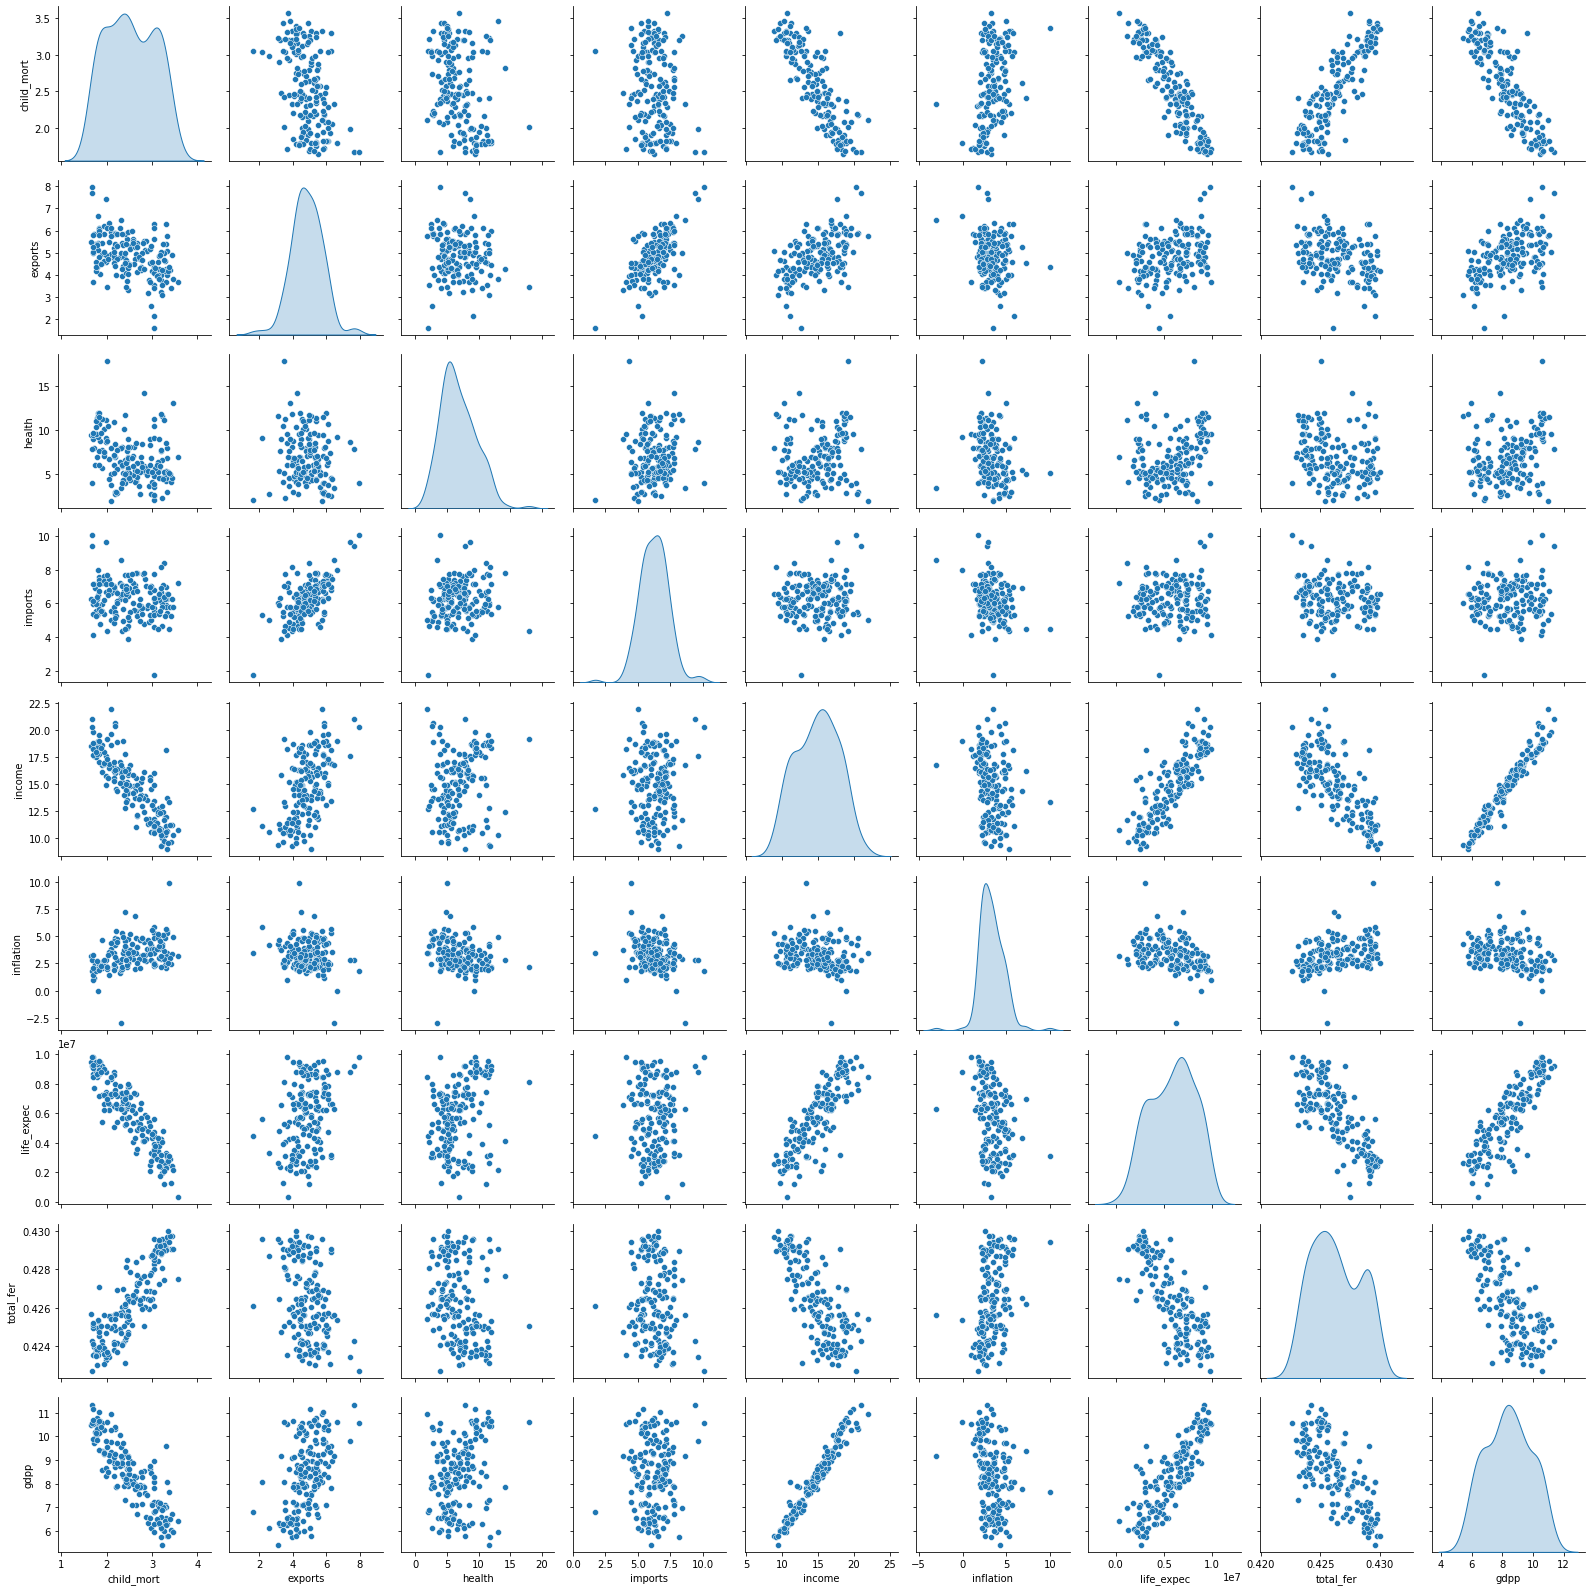

In [ ]:
# visualisasi dataset setelah transformasi
print('pairplot - setelah transformasi')
sns.pairplot(data=bc_data,diag_kind='kde')
plt.show()

setelah dilakukan transformasi, persebaran datanya terlihat lebih jelas sebelum dilakukan transformasi

# K-Means Clustering
K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

Untuk menentukan berapa jumlah cluster yang akan dipertimbangkan digunakan metode Elbow Curve dan skor siluet.

In [ ]:
# Menghitung Dalam-Cluster-Sum-of-Square.
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(bc_data)
    wcss.append(kmeans.inertia_)

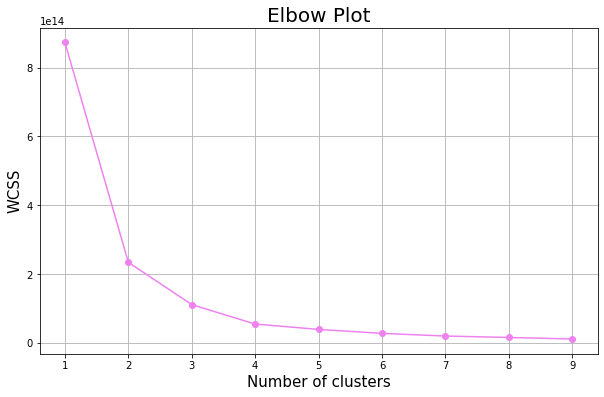

In [ ]:
# menampilkan elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss,marker="o",color="violet")
plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid(True)
plt.show()

Dalam plot di atas adalah Kurva Siku di mana sepanjang sumbu y adalah Within-Cluster-Sum-of-Square dan sepanjang sumbu x adalah jumlah cluster.

Dari grafik di atas kita bisa melihat tikungan di 2,3 dan 4.

kita dapat mempertimbangkan 3 atau 4 cluster dari pengamatan di atas.

In [ ]:
# menampilkan cluster terbaik berdasarkan grafik elbow
n_cluster = [2,3,4,5,6]

for K in n_cluster:
    kmeans = KMeans(n_clusters=K,random_state=10)
    predict = kmeans.fit_predict(bc_data)
    score = silhouette_score(bc_data,predict,random_state=10)
    print("untuk {} clusters silhouette score adalah {}".format(K,score) )

untuk 2 clusters silhouette score adalah 0.6165073987237679
untuk 3 clusters silhouette score adalah 0.5623252026522907
untuk 4 clusters silhouette score adalah 0.6106248280367453
untuk 5 clusters silhouette score adalah 0.5733936984291447
untuk 6 clusters silhouette score adalah 0.5833809864687153


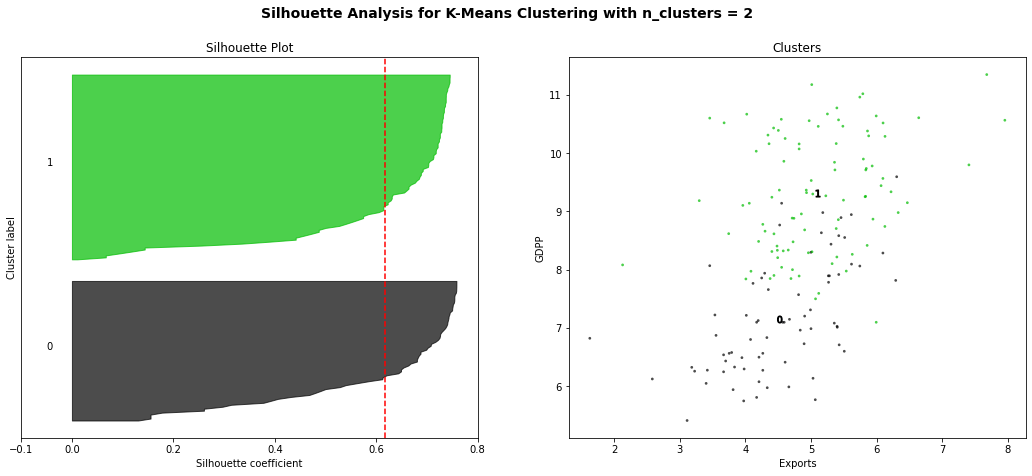

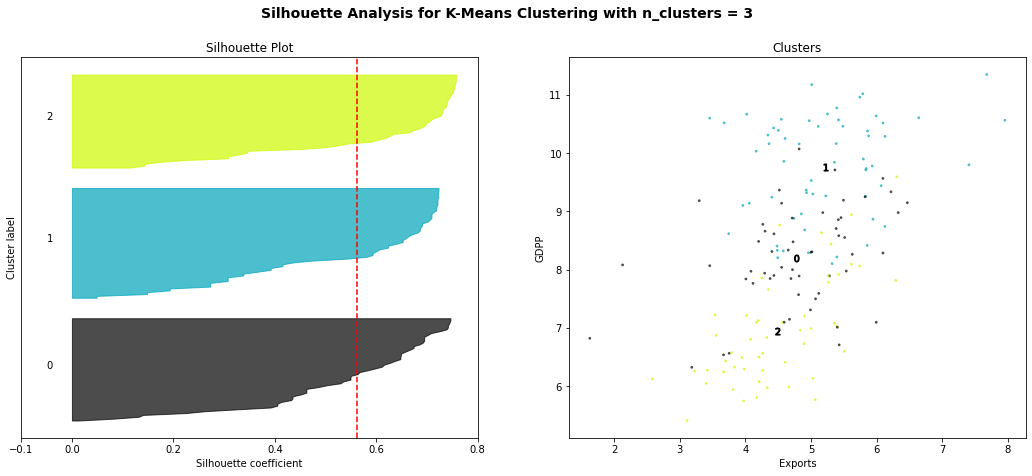

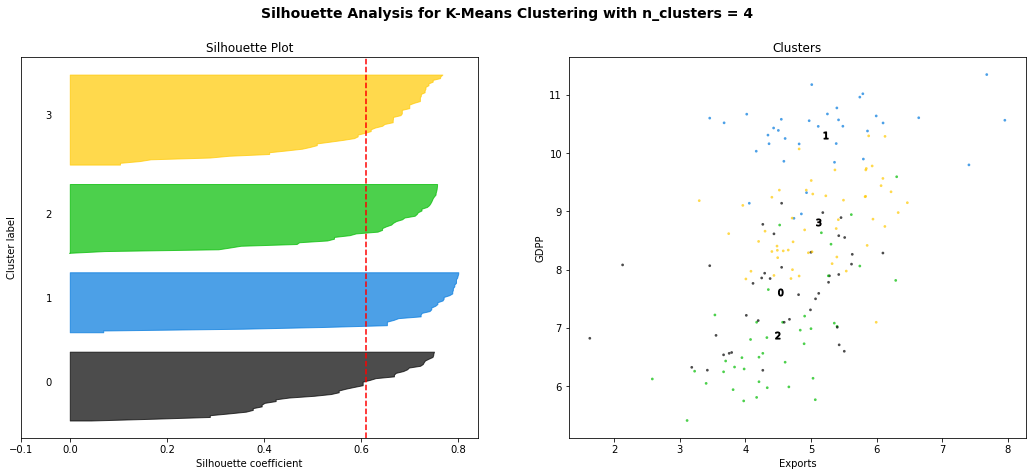

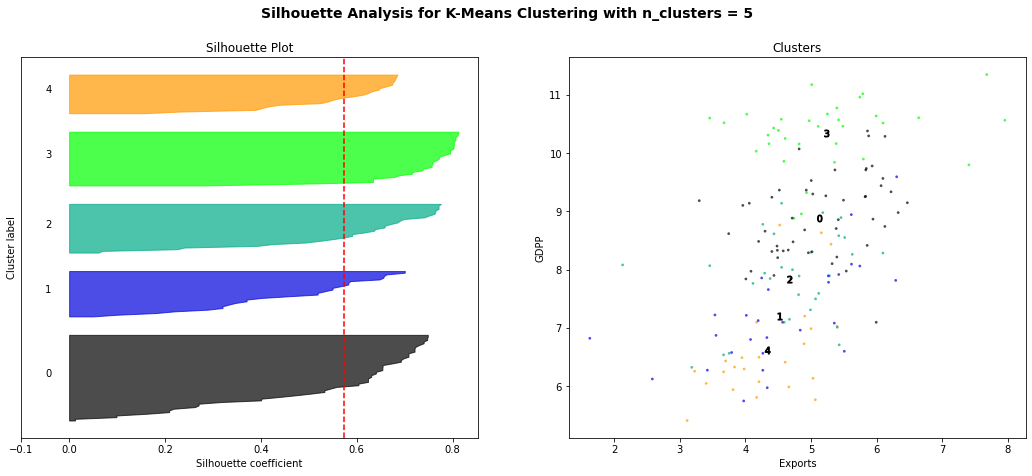

In [ ]:
# menampilkan clusters terbaik dalam silhoutte plot
n_clusters = [2, 3, 4, 5]
X = np.array(bc_data)

# untuk setiap nilai K, buat plot siluet untuk cluster yang terbentuk
for K in n_clusters:
   
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # subplot pertama adalah plot siluet
    # menginisialisasi cluster dengan nilai 'K' dan generator acak
    model = KMeans(n_clusters = K, random_state = 10)
    
    # cocokkan dan prediksi pada data yang diskalakan
    cluster_labels = model.fit_predict(X)

    # 'siluet_skor()' memberikan nilai rata-rata untuk semua sampels
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Hitung koefisien siluet untuk setiap sampel
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # menggabungkan skor siluet untuk sampel yang termasuk dalam cluster i, dan mengurutkannya
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # mengurutkan koefisien siluet
        ith_cluster_silhouette_values.sort()
        
        # menghitung ukuran cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # mewarnai setiap cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # beri label plot siluet dengan nomor cluster di tengah
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # hitung y_lower baru untuk plot selanjutnya
        y_lower = y_upper + 10 

    # mengatur sumbu dan label plot
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot garis vertikal untuk skor siluet rata-rata dari semua nilai
    ax1.axvline(x=silhouette_avg, color="Red", linestyle="--")

    # hapus y-axis ticks
    ax1.set_yticks([])  
    
    # atur ticks untuk x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # Plot ke-2 menunjukkan cluster sebenarnya yang terbentuk
    # pertimbangkan warna yang berbeda untuk setiap cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot untuk memvisualisasi clusters
    ax2.scatter(X[:, 1], X[:, 8], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label cluster centers
    centers = model.cluster_centers_
    
    # tampilan cluster center dengan nomor cluster 
    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[8], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # tambahkan sumbu dan judul plot
    ax2.set_title("Clusters")
    ax2.set_xlabel("Exports")
    ax2.set_ylabel("GDPP")
    
    # atur judul umum untuk subplot
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# tampilan plot
plt.show()

Dari plotting di atas kita dapat menganggap shilloutte plot terbaik no 2, karena kita mendapatkan plot siluet yang sangat menonjol untuk no. cluster = 2.

In [ ]:
# cluster n sebanyak n adalah yang terbaik
kmeans = KMeans(n_clusters = 3,random_state = 10)
kmeans.fit(bc_data)

KMeans(n_clusters=3, random_state=10)

In [ ]:
# set kmeans
set(kmeans.labels_)

{0, 1, 2}

Kita bisa melihat setiap record memiliki label diantara 0,1.

In [ ]:
# menampilkan kmeans cluster centers
kmeans.cluster_centers_

array([[2.51034519e+00, 4.77846855e+00, 5.86035714e+00, 6.22221434e+00,
        1.46955726e+01, 3.49782916e+00, 5.83880358e+06, 4.25797005e-01,
        8.20802002e+00],
       [2.01765672e+00, 5.21345452e+00, 8.05816667e+00, 6.28063230e+00,
        1.76137724e+01, 2.70673211e+00, 8.27239331e+06, 4.24864726e-01,
        9.77120296e+00],
       [3.13723195e+00, 4.48412718e+00, 6.40294118e+00, 6.24871828e+00,
        1.18081421e+01, 3.75328410e+00, 3.01622503e+06, 4.28552043e-01,
        6.94243568e+00]])

In [ ]:
country_kmeans_df = bc_data.copy()

In [ ]:
country_kmeans_df['clusters'] = kmeans.labels_

In [ ]:
# membaca 5 data pertama setelah di transmisi
country_kmeans_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Afghanistan,3.208692,3.225288,7.58,6.341887,10.816138,3.902316,2.364493e+06,0.429421,6.259053,2
Albania,2.392947,4.491850,6.55,6.523385,14.899242,3.004359,7.271084e+06,0.424320,8.207013,1
Algeria,2.637163,4.959927,4.17,5.574598,15.548799,4.797498,7.341982e+06,0.426892,8.291235,1
Angola,3.332581,5.744331,2.85,6.239373,13.655328,5.467484,3.019940e+06,0.429574,8.063779,2
Antigua and Barbuda,2.166808,5.225818,6.03,6.981822,16.554714,2.246702,7.449293e+06,0.425514,9.268509,1


In [ ]:
# Jumlah record untuk setiap cluster.
country_kmeans_df['clusters'].value_counts()

1    60
0    56
2    51
Name: clusters, dtype: int64

In [ ]:
# Analysis semua KMeans-Clusters
country_kmeans_df.groupby(['clusters']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,2.510345,4.778469,5.860357,6.222214,14.695573,3.497829,5.838804e+06,0.425797,8.208020
1,2.017657,5.213455,8.058167,6.280632,17.613772,2.706732,8.272393e+06,0.424865,9.771203
2,3.137232,4.484127,6.402941,6.248718,11.808142,3.753284,3.016225e+06,0.428552,6.942436


- clusters 0 memiliki Average live expectancy 56 (negara berkembang)
- clusters 1 memiliki Average live expectancy 60 (negara maju)
- clusters 2 memiliki Average live expectancy 51 (negara miskin)

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state = 10)
kmeans.fit(bc_data)
country_kmeans_df['clusters_without_transformasi'] = kmeans.labels_

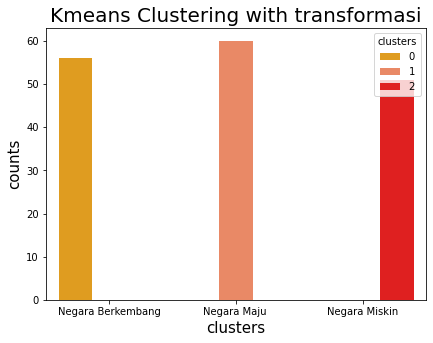

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=country_kmeans_df,x='clusters',hue='clusters',palette=['Orange','Coral','Red'])
plt.title('Kmeans Clustering with transformasi',fontsize=20)
plt.xlabel('clusters',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.xticks(np.arange(3), ['Negara Berkembang', 'Negara Maju ','Negara Miskin'])

plt.show()

**Sumber :**
https://github.com/rahulacj/Unsupervised-Learning-on-Country-Dataset/blob/main/CountryData_Clustering.ipynb
https://www.youtube.com/watch?v=sVn7KMNyGBQ
https://sis.binus.ac.id/2022/01/31/clustering-algoritma-k-means/